<a href="https://colab.research.google.com/github/het1752/Deep-Learning/blob/main/Smoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/smoke_detection_iot.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
data.sample(7)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
17760,17760,1654751091,17.255,53.83,1094,409,12902,19446,938.714,1.78,1.85,12.25,1.910,0.043,17760,1
47331,47331,1654783680,26.830,48.20,1350,411,12965,19382,938.711,2.04,2.12,14.06,2.192,0.050,22337,1
44221,44221,1654780570,27.060,47.50,1197,400,12920,19425,938.700,1.88,1.95,12.93,2.017,0.046,19227,1
44954,44954,1654781303,24.820,52.41,1191,400,12927,19432,938.752,1.72,1.78,11.81,1.842,0.042,19960,1
42326,42326,1654778675,24.540,53.46,1155,406,12900,19442,938.756,1.81,1.89,12.49,1.948,0.044,17332,1
45552,45552,1654781901,24.900,51.04,1193,400,12966,19429,938.723,2.02,2.10,13.88,2.164,0.049,20558,1
56453,56453,1654717498,59.280,11.00,60000,860,12574,18197,936.713,52.62,58.25,353.15,60.757,4.753,5311,0


In [4]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [5]:
data.drop(['Unnamed: 0','UTC'],axis=1,inplace=True)

In [6]:
data.sample(5)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
34659,21.350,60.78,914,960,12641,19508,939.145,2.37,2.46,16.32,2.545,0.057,9665,1
30137,20.040,53.30,63,400,13226,20155,939.711,2.09,2.17,14.37,2.240,0.051,5143,1
11958,16.389,47.59,1120,594,12818,19457,939.050,2.26,2.35,15.54,2.423,0.055,11958,1
2640,15.945,52.56,67,400,13197,20104,939.648,1.27,1.32,8.74,1.363,0.031,2640,0
13693,19.112,47.89,1141,510,12844,19445,938.897,2.09,2.17,14.40,2.245,0.051,13693,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  CNT             62630 non-null  int64  
 13  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 6.7 MB


In [8]:
data.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [9]:
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [10]:
data.corr()['Fire Alarm']

Temperature[C]   -0.163902
Humidity[%]       0.399846
TVOC[ppb]        -0.214743
eCO2[ppm]        -0.097006
Raw H2            0.107007
Raw Ethanol      -0.340652
Pressure[hPa]     0.249797
PM1.0            -0.110552
PM2.5            -0.084916
NC0.5            -0.128118
NC1.0            -0.082828
NC2.5            -0.057707
CNT               0.673762
Fire Alarm        1.000000
Name: Fire Alarm, dtype: float64

In [11]:
data.dtypes

Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

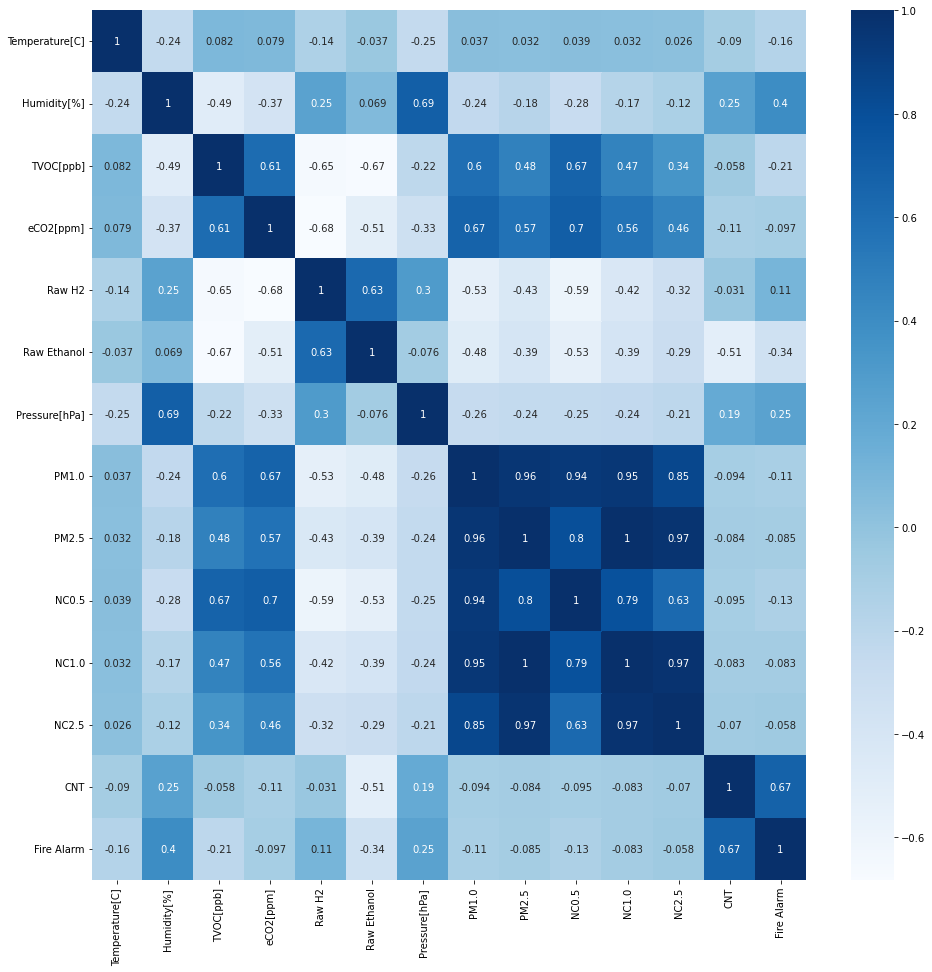

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


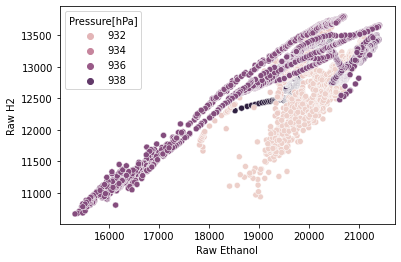

In [13]:
sns.scatterplot(data['Raw Ethanol'],data['Raw H2'],hue=data['Pressure[hPa]'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


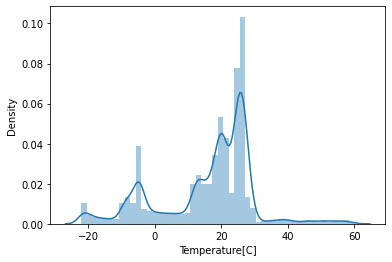

In [14]:
sns.distplot(data['Temperature[C]'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


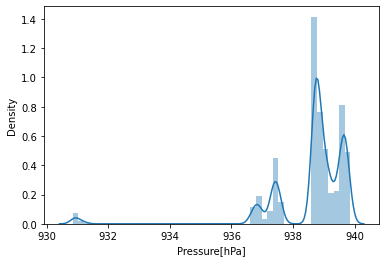

In [15]:
sns.distplot(data['Pressure[hPa]'])

In [16]:
data['Pressure[hPa]'].skew()

-3.603996787439911

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f344b6c90d0>,
      dtype=object)

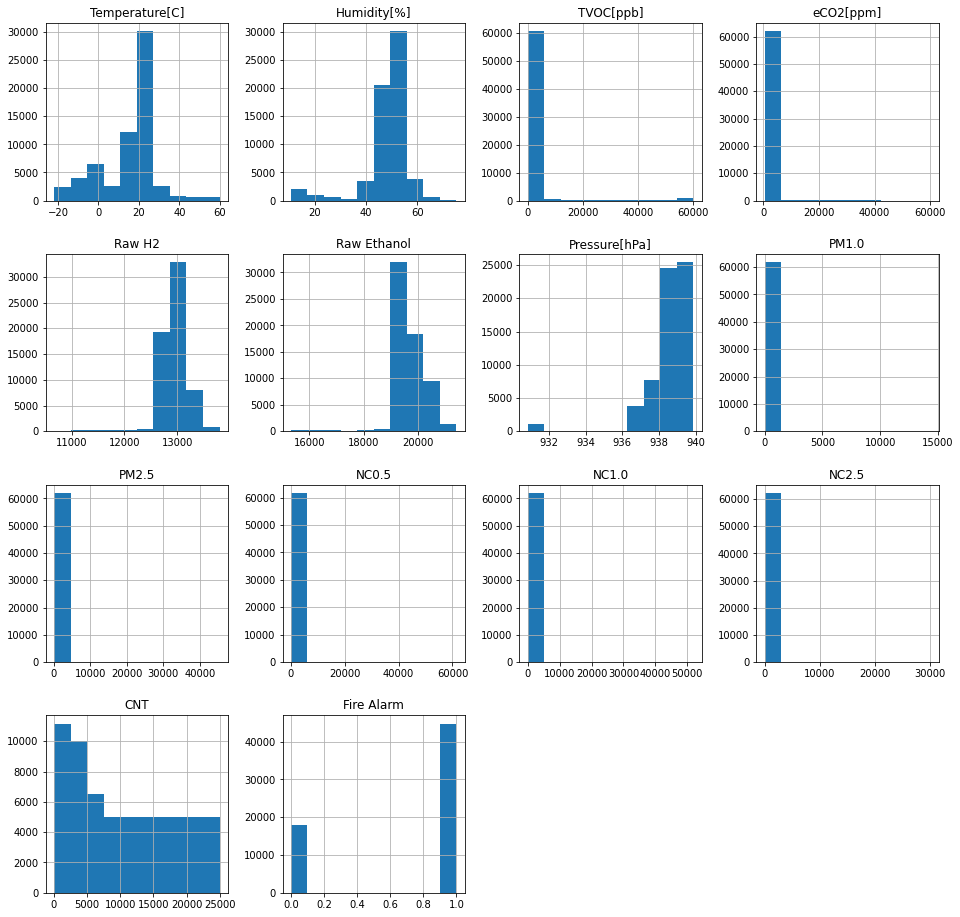

In [17]:
data.hist(figsize=(16,16))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

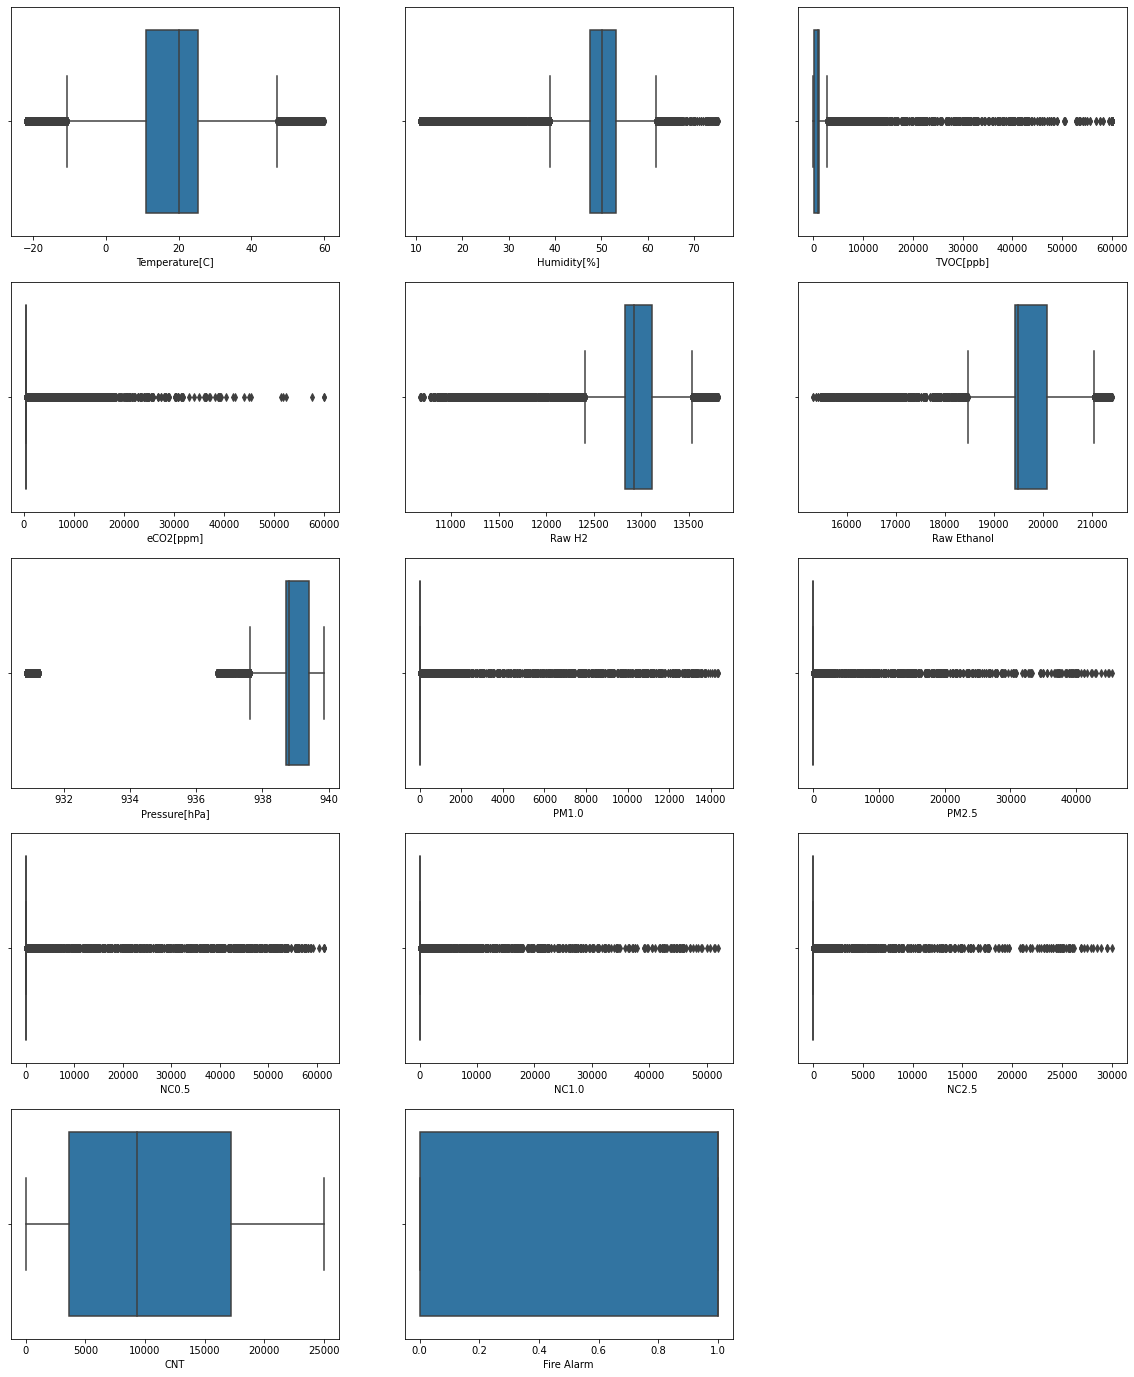

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [19]:
x=data.drop(['Fire Alarm'],axis=1)
y=data['Fire Alarm']
x.shape,y.shape

((62630, 13), (62630,))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(len(x_train),len(y_train),len(x_test),len(y_test))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

50104 50104 12526 12526
(50104, 13) (12526, 13) (50104,) (12526,)


In [21]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
import tensorflow as tf

In [30]:
model=Sequential()
model.add(tf.keras.layers.Dense(13,input_dim=(13),activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 13)                182       
                                                                 
 dense_4 (Dense)             (None, 10)                140       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=25)

Epoch 1/25
2506/2506 [==============================] - 6s 2ms/step - loss: 0.5428 - accuracy: 0.9774 - val_loss: 0.1572 - val_accuracy: 0.9934
Epoch 2/25
2506/2506 [==============================] - 6s 2ms/step - loss: 0.3110 - accuracy: 0.9824 - val_loss: 0.1578 - val_accuracy: 0.9909
Epoch 3/25
2506/2506 [==============================] - 6s 2ms/step - loss: 0.2004 - accuracy: 0.9854 - val_loss: 0.0714 - val_accuracy: 0.9962
Epoch 4/25
2506/2506 [==============================] - 8s 3ms/step - loss: 0.2099 - accuracy: 0.9872 - val_loss: 0.1477 - val_accuracy: 0.9841
Epoch 5/25
2506/2506 [==============================] - 5s 2ms/step - loss: 0.1305 - accuracy: 0.9885 - val_loss: 0.0834 - val_accuracy: 0.9966
Epoch 6/25
2506/2506 [==============================] - 6s 2ms/step - loss: 0.1040 - accuracy: 0.9892 - val_loss: 0.0749 - val_accuracy: 0.9947
Epoch 7/25
2506/2506 [==============================] - 6s 2ms/step - loss: 0.1140 - accuracy: 0.9854 - val_loss: 0.0670 - val_accuracy:

In [34]:
y_pred=model.predict(x_test)
print(y_pred)
print(type(y_pred))

392/392 [==============================] - 1s 1ms/step
[[1.        ]
 [1.        ]
 [0.00503809]
 ...
 [1.        ]
 [0.00503809]
 [1.        ]]
<class 'numpy.ndarray'>


In [35]:
y_pred=list(y_pred)
y_pred

[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.00503809], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.00503809], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([4.1528393e-33], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.9630093], dtype=float32),
 array([1.], dtype=float32),
 array([0.00503809], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.00130062], dtype=float32),
 array([1.], dtype=float32),
 array([0.00503809], dtype=float32),
 array([0.00503809], dtype=float32),
 array([1.], dtype=float32),
 array([0.00503809], dtype=float32),
 array([0.00503809], dtype=float32),
 array([1.], dtype=float32),
 array([0.00503809], dtype=float32),
 array([0.99983853], dtype=float32),
 ar

In [36]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [37]:
model.evaluate(x_test,y_test)

392/392 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9933


[0.1045004203915596, 0.9932939410209656]

In [38]:
history.history

{'loss': [0.5427732467651367,
  0.31097978353500366,
  0.20036680996418,
  0.20988783240318298,
  0.1304677426815033,
  0.10403355211019516,
  0.11396590620279312,
  0.0598083958029747,
  0.07298219949007034,
  0.06038001552224159,
  0.0937218964099884,
  0.08920295536518097,
  0.05754644423723221,
  0.05493616312742233,
  0.04933485388755798,
  0.0511082299053669,
  0.044917915016412735,
  0.04613034427165985,
  0.05940357968211174,
  0.04992624744772911,
  0.03517690673470497,
  0.030332209542393684,
  0.03327680379152298,
  0.03178783506155014,
  0.027783652767539024],
 'accuracy': [0.9774269461631775,
  0.9824365377426147,
  0.9853903651237488,
  0.9872465133666992,
  0.9885039329528809,
  0.9892024397850037,
  0.985350489616394,
  0.9885837435722351,
  0.9851109981536865,
  0.9853305220603943,
  0.9768880605697632,
  0.970341682434082,
  0.9851908087730408,
  0.9874061942100525,
  0.9862885475158691,
  0.9852506518363953,
  0.9874261617660522,
  0.9892024397850037,
  0.98988103866

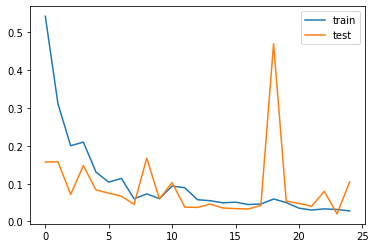

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[3587    7]
 [  77 8855]]


In [42]:
print(classification_report(y_test, y_pred, target_names=["Alarm", "No Alarm"]))

              precision    recall  f1-score   support

       Alarm       0.98      1.00      0.99      3594
    No Alarm       1.00      0.99      1.00      8932

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526

